In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.set(style='white',context='talk',palette='Set1')


/Users/noa/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### What is a classification task?

In classification, we predict **categories** or **labels** instead of numerical values. 
Some examples: 
* Using machine learning to classify medical images (such as X-rays, MRIs, or histopathology slides) to identify whether a patient has a specific disease.
* Predicting the function of proteins by classifying them into different functional categories based on their amino acid sequences. This is crucial for understanding cellular processes.

<img src="https://get-elevate.com/wp-content/uploads/2022/05/Multi-Class-Classification-Chart.png" width="300"/>

As an example, we will use the `breast cancer` dataset, which was used in the previous lesson. This time, we will load the dataset using the `sklearn.datasets` module.



In [2]:
import sklearn.datasets
dataset = sklearn.datasets.load_breast_cancer()
print("Features:", dataset.feature_names)

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [54]:
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target.astype('str')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [62]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

#### Excercicse 0 (warmup)

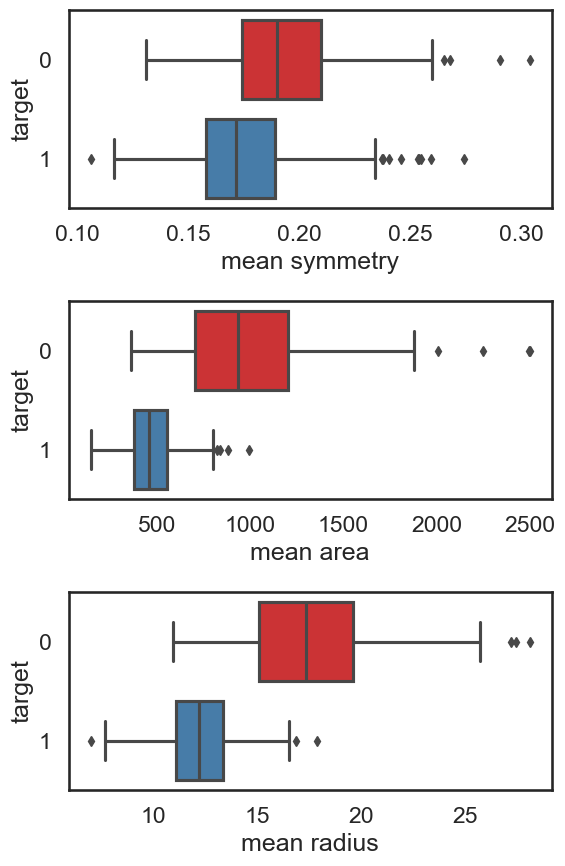

In [59]:
fig, axes = plt.subplots(3, 1, figsize=(6, 9))

# Plot the boxplots on each subplot
sns.boxplot(ax=axes[0], data=df, x="mean symmetry", y="target")
sns.boxplot(ax=axes[1], data=df, x="mean area", y="target")  # Replace 'another_feature' with the actual feature
sns.boxplot(ax=axes[2], data=df, x="mean radius", y="target")  # Replace 'yet_another_feature' with the actual feature

# Adjust layout for better visualization
plt.tight_layout()

There are many features. To make the classification problem a bit more difficult, we will only use the features mean symmetry','mean area','mean radius.
Then, we split our dataset to train and test, as we did in the previous class.

In [41]:
from sklearn.model_selection import train_test_split
X = df[['mean symmetry','mean area','mean radius']]#df.drop(['target'],axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

#### K-nearest neighbors classifier (KNN)

The simplest possible classifier is the nearest neighbor: given a new observation `X_test`, find in the training set (i.e. the data used to train the estimator) the observation with the *closest feature vector*, and use it's corresponding category as the prediction.
We will use the `KNeighborsClassifier` function under `sklearn.neighbors`. 

In [42]:
import sklearn.neighbors as nb
knn = nb.KNeighborsClassifier()
knn.fit(X_train, y_train) 

KNeighborsClassifier()

### How can we measure the performance of a classification model?

<img src="https://cdn-images-1.medium.com/max/800/1*_JY_jxfndH8oBI3clamifA.png" width="400"/>


* *True positives (TP)*: # of observations we correctly predicted as positive. ("hit")
* *True negatives (TN)*: # of observations we correctly predicted as negative. ("correct rejection")
* *False positives (FP)*: # of observations we falsely predicted as positive. ("False alarm")
* *False negatives (FN)*: # of observations we falsely predicted as negative. ("False miss, underestimation")


* **Accuracy**: the proportion of correcly classified observations: (TP+TN)/(TP+TN+FP+FN)
* **True positive rate (TPR) /Sensitivity / Recall** : number of correct positives divided by total number of actual positives: TP/(TP+FN). Recall measures the ability of the classifier to find all positive samples. How can we obtain perfect recall?
* **False positive rate (FPR)** Percentage of samples incorrectly classified as positives among the true negatives. FP/(FP+TN). FPR measures the probability of a 'false alarm'.
* **Precision**: number of correct positives divided by all positive predictions: TP/(TP+FP). Precision measures the ability of the classifier not to label as positive a negative sample. How can we obtain perfect precision?
* **F1 score** : 2\*(Precision*Recall)/(Percision+Recall). It can be interpreted as the harmonic mean of precision and recall.



Let's predict the labels (the Iris species) for the test data and compare with the real labels:

In [43]:
y_pred_knn = knn.predict(X_test)
print('Accuracy:', round((y_pred_knn == y_test).mean(),3))

Accuracy: 0.904


The number of true negatives, true positives, false negatives and true positives:

In [44]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()

##### Excercice 1:
Using the tn,fp,fn,tp values, calculate the precision, recall and F1 score.

In [45]:
precision_knn = tp/(tp+fp)
recall_knn  = tp/(tp+fn)
F1_score_knn  = (2*precision_knn*recall_knn )/(precision_knn+recall_knn)
print(f"precision = {round(precision_knn ,2)}, recall = {round(recall_knn ,2)}, F1 score = {round(F1_score_knn,2)} ")


precision = 0.9, recall = 0.96, F1 score = 0.93 


### Logistic regression

Logistic regression is a statistical method commonly used for binary classification problems. Unlike linear regression, which predicts continuous values, logistic regression predicts the **probability of an instance belonging to a particular class**.

In our case, logsitic regression would estimate $P(y='malignant'|features)$, which of course ranges between 0 and 1. Given the estimated probability for a patient, we can predict its status using a pre-defined threshold. For example, we can decide that patients for which $P(y='malignant'|features)>0.5$ are considered 'malignant'. Alternatively, we can be more conservative and use a lower threshold such as 0.1.

Using linear regression, we would use the following formulation $P(y='malignant'|features) = \Sigma\beta_i x_i$.
Using linear regression is not appropriate for this task, as linear regression's output is continious, $-inf$ to $+inf$, while our probability must fall between 0 and 1.

Hence, to avoid this issue, me must apply a transformation to $\Sigma\beta_i x_i$ which will constrains its values within the range of 0 and 1. In logistic regression, we use the **logistic function**:
### $f(x)=\frac{e^x}{1 + e^x} $
The logistic function always produce a S-shaped curve of this form:
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/480px-Logistic-curve.svg.png" width="200"/>
Overall we obtain the following formulation:

### $P(y='malignant' | features) = f(\Sigma\beta_i x_i) = \frac{e^{\Sigma\beta_i x_i}}{1+e^{\Sigma\beta_i x_i}}$

#### How are the regression coefficients estimates?

In logistic regression, we determine the coefficients, denoted as $\beta_0, \ldots, \beta_p$, through a method known as the maximum-likelihood approach. This statistical technique seeks to find the values for these coefficients that maximize the likelihood of the observed outcomes in our dataset. In simpler terms, we're essentially trying to discover the set of coefficients that make our model most probable given the training data.
Let's apply logistic regression on our training data using the `LogisticRegression` function under `sklearn.linear_model`:

In [24]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=1000)
lg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

#### Interpretation of logistic regression coefficients

In [40]:
intercept = lg.intercept_[0]
coefficients = lg.coef_[0]
feature_names = ['intercept'] + list(lg.feature_names_in_)

coeff_table = pd.DataFrame({'coeff': [intercept] + list(coefficients), 'features': feature_names})
print(coeff_table)

      coeff       features
0  0.342448      intercept
1 -1.115626  mean symmetry
2 -0.022001      mean area
3  1.004505    mean radius


Let's estimate accuracy, precision and recall using the `sklearn.metrics` module.

In [69]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
y_pred_lg = lg.predict(X_test) #prediction using a threshold of P > 0.5
tn_lg, fp_lg, fn_lg, tp_lg = confusion_matrix(y_test, y_pred_lg).ravel()
accuracy_lg = (y_pred_lg==y_test).mean()
tpr_lg = tp_lg/(tp_lg+fn_lg)
fpr_lg = fp_lg/(fp_lg+tn_lg)
print(f'Accuracy = {round(accuracy_lg,2)}, TPR = {round(tpr_lg,2)}, FPR = {round(fpr_lg,2)} ')

Accuracy = 0.91, TPR = 0.98, FPR = 0.19 


Note that the metrics above are calculated assuming a default threshold of *0.5*. Using a different thredhold would result in different precision, recall and accuracy.

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*QG0pno3_5tBm0fzf5Zp6Pw.png" width="500"/>


Let's obtain the **probability predictions** on our test data:

In [70]:
lg_probs = lg.predict_proba(X_test)[:,1] # Probability of obtaining 1
lg_probs[:5]

array([0.78899251, 0.83160851, 0.71193624, 0.63541826, 0.85112211])

##### Excercice 2:

1. Write a function that accepts a 1. threshold, 2. vector of estimated probabilities on test data, 3. true test labels . The function returns a tuple: (TPR,FPR). Apply the function for the thresholds 0.01 and 0.99.
2. Estimate TPR and FPR for the following *range* of thresholds: 0.01 to 0.99 based on steps of size 0.1. 
3. Plot the precision versus recall across thresholds.

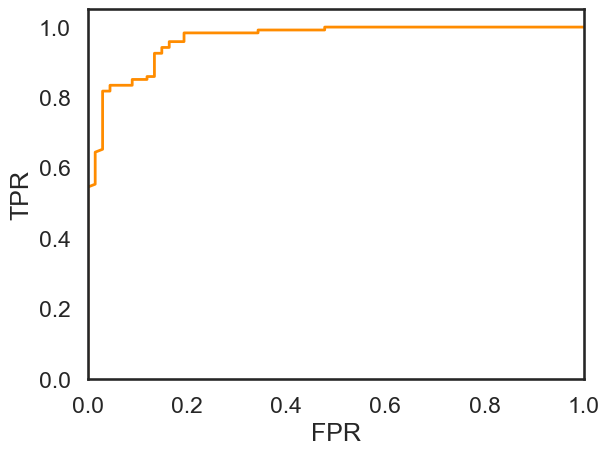

In [96]:
#1.
def get_threshold_tpr_fpr(threshold, test_probs, test_labels):
    y_pred = test_probs > threshold
    tn, fp, fn, tp = confusion_matrix(test_labels, y_pred).ravel()
    tpr= tp/(tp+fn)
    fpr = fp/(fp+tn)
    return tpr,fpr
#2.
tpr_scores = []
fpr_scores = []
for threshold in list(np.arange(0, 1, 0.001))+[np.inf]:
    t_tpr,t_fpr = get_threshold_tpr_fpr(threshold, lg_probs, y_test)
    #print(t_tpr,t_fpr)
    tpr_scores.append(t_tpr)
    fpr_scores.append(t_fpr)
#3.
plt.plot(fpr_scores,tpr_scores, color='darkorange', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
#plt.title('Precision-Recall Curve')
plt.show()
    

Why is this plot interesting?


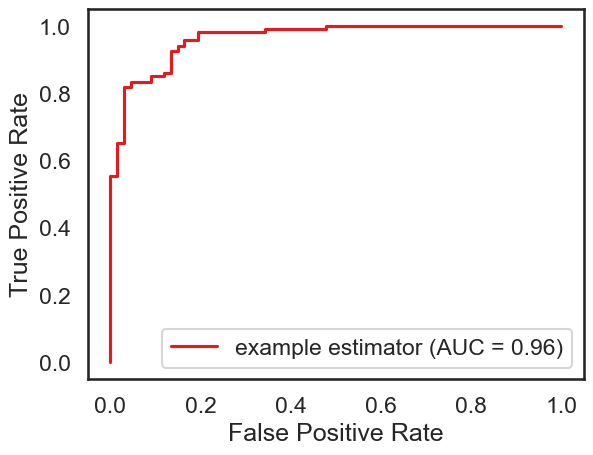

In [92]:
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()

 **Why is this plot intesting?**
 
The Precision-Recall curve is a graphical illustration of the trade of between precision and recall when using different thresholds.
The area under the Precision-Recall curve (AUPRC) is a common measure of the model's performance, which

#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)